# 워드클라우드 시각화

In [1]:
from wordcloud import WordCloud  # 워드 클라우드를 그리기
from konlpy.tag import Komoran   # 형태소 분석기, 품사 태깅
from konlpy.corpus import kolaw  # 법율문서 말뭉치
import matplotlib.pyplot as plt

In [2]:
# 파일이름 확인
kolaw.fileids() 

['constitution.txt']

In [3]:
# 말뭉치 파일 읽기, 우리나라 헌법 데이터
para = kolaw.open('constitution.txt').read()
print(type(para))
para[:500]

<class 'str'>


'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, '

## 형태소 분석

In [8]:
# 형태소 분석 -> 명사만 뽑기
tagger = Komoran()
tagger.nouns(para)
nouns = tagger.nouns(para)

In [10]:
len(tagger.nouns(para))

3358

In [9]:
print(type(nouns))
nouns[:10]

<class 'list'>


['대한민국', '헌법', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부']

## 문자열 타입으로 변환하기

In [7]:
# 리스트 -> 문자열
text = ", ". join(nouns)
text[:10]

'대한민국, 헌법, '

## 워드 클라우드 그리기

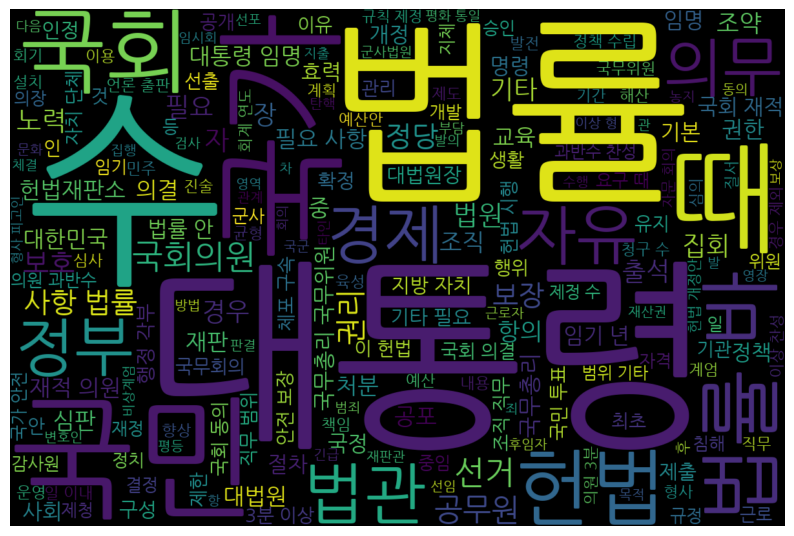

In [16]:
my_path='./fonts/NanumGothic.ttf'
fig = plt.figure(figsize=(10,10))

# 워드 클라우드 객체 설정
wordcloud = WordCloud(font_path=my_path, 
                      background_color='black', 
                      width=1200, 
                      height=800).generate(text)
# 워드 클라우드 그리기
# plt.imshow(wordcloud)

# interpolation='bilinear' : 이미지를 화면에 표시할 때 픽셀 사이의 값을 보간하는 방법
# plt.imshow(wordcloud.to_array(), interpolation='bilinear')  # 가장 정확하고 안정적인 출력 방법
plt.imshow(wordcloud, interpolation='bilinear')   # WordCloud 객체는 __array__()라는 내부 메서드를 가지고 있어서 numpy array처럼 동작
plt.axis('off')   # 축 표시를 제거함
plt.show()


## 이미지 모양으로 워드 클라우드 그리기

- 마스킹하기

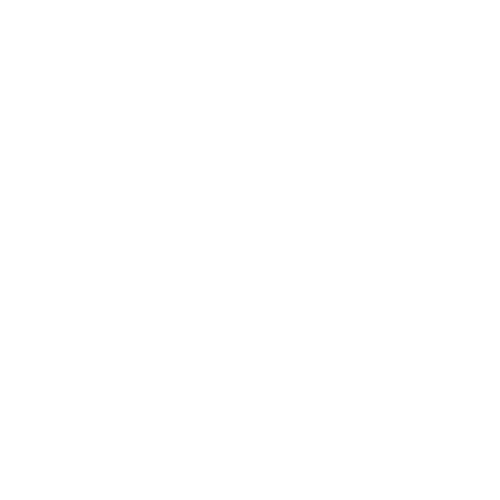

In [17]:
import numpy as np
from PIL import Image

icon = Image.open('./images/korea_map.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))  # 흰색
# mask = Image.new("RGB", icon.size, (0,0,0))  # 검정색 (0~255)
mask

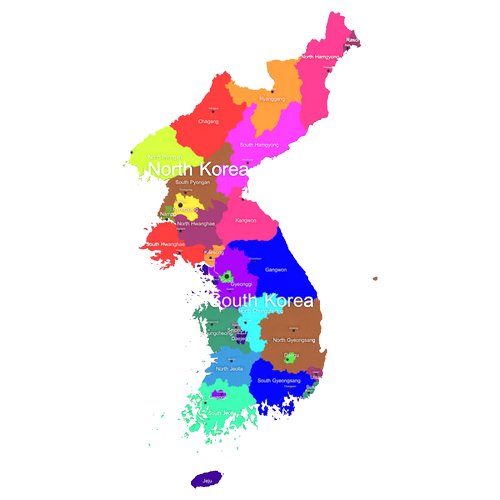

In [18]:
mask.paste(icon, icon)
mask

In [19]:
mask = np.array(mask)
mask.shape

(500, 500, 3)

## 워드클라우드 그리기

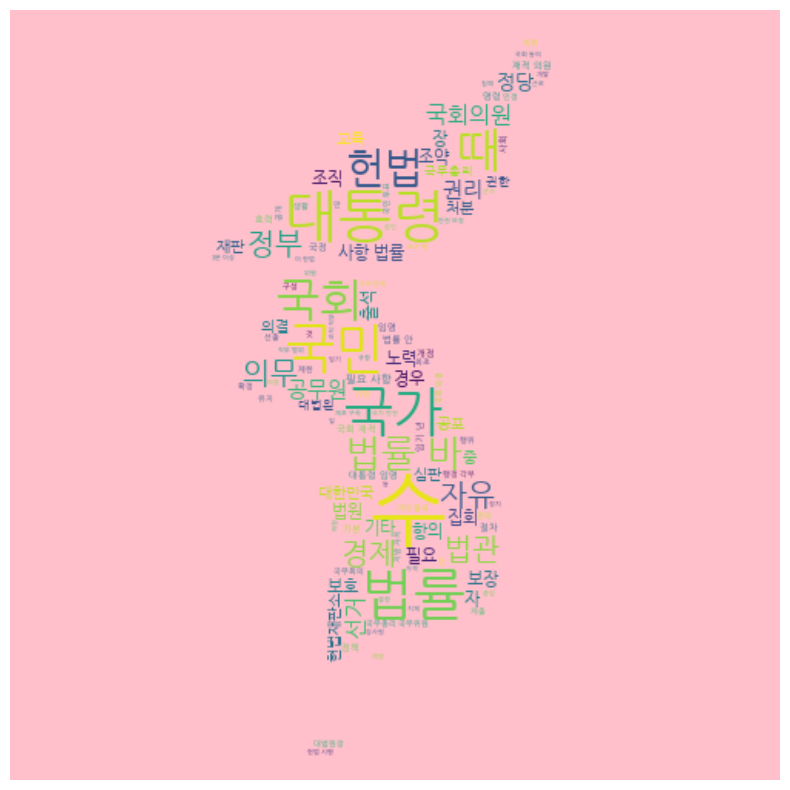

In [28]:
from PIL import Image
icon = Image.open('./images/korea_map.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon) 
mask = np.array(mask)
wordcloud = WordCloud(font_path=my_path,
                      # background_color=None,
                      background_color='pink',
                      width=1200,
                      height=800,
                      mask= mask).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

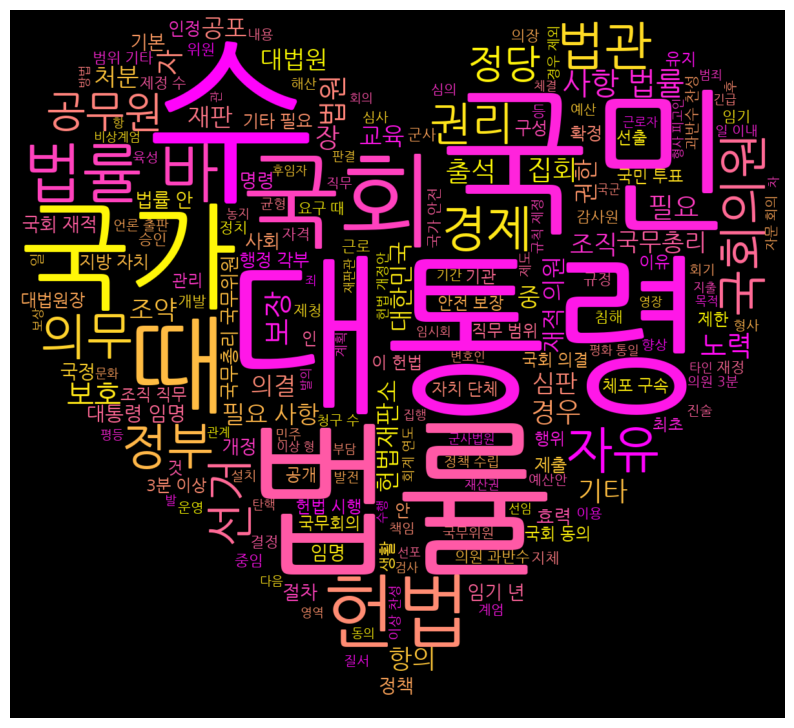

In [31]:
from PIL import Image
icon = Image.open('./images/heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon) 
# mask.paste(icon) 
mask = np.array(mask)
wordcloud = WordCloud(font_path=my_path,
                      background_color=None,
                      width=1200,
                      height=800,
                      colormap='spring',
                     mask= mask).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
wordcloud.to_file("test.png")

## 다른 데이터로 해보기

In [39]:
from wordcloud import WordCloud
from konlpy.tag import Komoran
import matplotlib.pyplot as plt
from konlpy.corpus import kolaw 

In [40]:
from Korpora import Korpora
Korpora.fetch("korsts")

[korsts] download sts-train.tsv: 1.05MB [00:00, 4.36MB/s]                                                              
[korsts] download sts-dev.tsv: 311kB [00:00, 1.68MB/s]                                                                 
[korsts] download sts-test.tsv: 254kB [00:00, 1.37MB/s]                                                                


In [42]:
from Korpora import Korpora
corpus = Korpora.load('korsts')


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : KakaoBrain
    Repository : https://github.com/kakaobrain/KorNLUDatasets
    References :
        - Ham, J., Choe, Y. J., Park, K., Choi, I., & Soh, H. (2020). KorNLI and KorSTS: New Benchmark
           Datasets for Korean Natural Language Understanding. arXiv preprint arXiv:2004.03289.
           (https://arxiv.org/abs/2004.03289)

    This is the dataset repository for our paper
    "KorNLI and KorSTS: New Benchmark Datasets for Korean Natural Language Understanding."
    (https://arxiv.org/abs/2004.03289)
    We introduce KorNLI and KorSTS, which are NLI and STS datasets in Korean.

    # License
    Creative Commons Attribution-ShareAlike license (CC BY-SA 4.0)
    Details in https://creativecommons.org/licenses

## 형태소 추출

In [48]:
# 말뭉치의 텍스트 부분만 추출
train_texts = corpus.train
# dev_texts = corpus.dev
# test_texts = corpus.
train_texts = train_texts.texts

# 말뭉치를 텍스트로 만들기
text_corpus = " ".join(train_texts)
print(type(text_corpus))
text_corpus[:200]

<class 'str'>


'비행기가 이륙하고 있다. 한 남자가 큰 플루트를 연주하고 있다. 한 남자가 피자에 치즈를 뿌려놓고 있다. 세 남자가 체스를 하고 있다. 한 남자가 첼로를 연주하고 있다. 몇몇 남자들이 싸우고 있다. 남자가 담배를 피우고 있다. 남자가 피아노를 치고 있다. 한 남자가 기타를 치고 노래를 부르고 있다. 사람이 고양이를 천장에 던지고 있다. 그 남자는 다른 남자'

In [49]:
# 형태소 추출 : 시간 꽤 걸림
tagger = Komoran()
nouns = tagger.nouns(text_corpus)

## 문자열로 만들기

In [50]:
text2 = ','.join(nouns)
text2[:20]

'비행기,이륙,남자,플루트,연주,남자,'

## 워드 클라우드 그리기

(np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5))

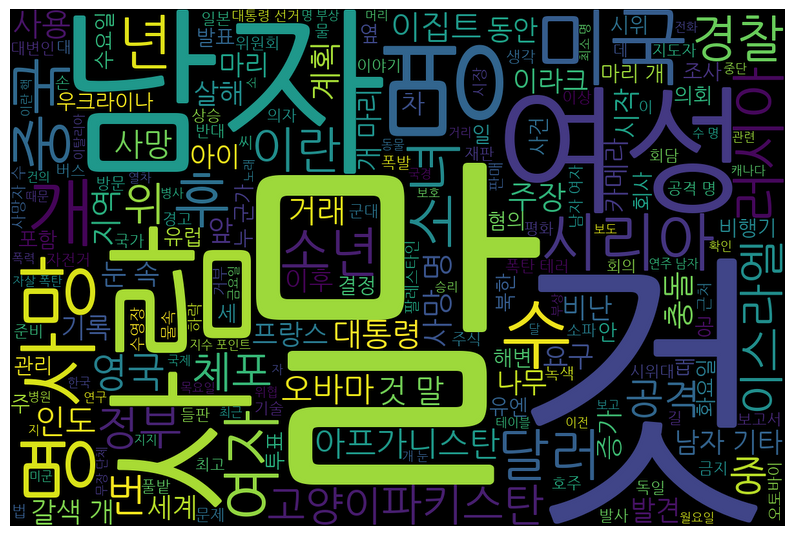

In [53]:
# 클라우딩 객체 설정
my_path='./fonts/NanumGothic.ttf'
wordcloud = WordCloud(font_path=my_path, 
                      background_color=None, 
                      width=1200, 
                      height=800).generate(text2)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')